In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [2]:
df=pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
df.drop('company_size',axis=1,inplace=True)
df.company_type.replace(np.nan,'Early Stage Startup',inplace=True)
df.gender.replace(np.nan,'Female',inplace=True)
df.enrolled_university.replace(np.nan,'Part time course',inplace=True) 
df.education_level.replace(np.nan,'Phd',inplace=True)  
df.major_discipline.replace(np.nan,'Business Degree',inplace=True)
df.experience.replace(np.nan,8,inplace=True)
df.experience.replace('>20',20,inplace=True)
df.experience.replace('<1',1,inplace=True)
df['experience']=df['experience'].astype('int')
df.last_new_job.replace(np.nan,0,inplace=True)
df.last_new_job.replace('never',5,inplace=True)
df.last_new_job.replace('>4',4,inplace=True)
df['last_new_job']=df['last_new_job'].astype('int')
df['target']=df['target'].astype('int')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,33241,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int32  
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  int32  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 1.7+ MB


In [9]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [10]:
df.drop('enrollee_id',axis=1,inplace=True)

In [11]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


Text(0.5, 1.0, 'city_development_index distribution')

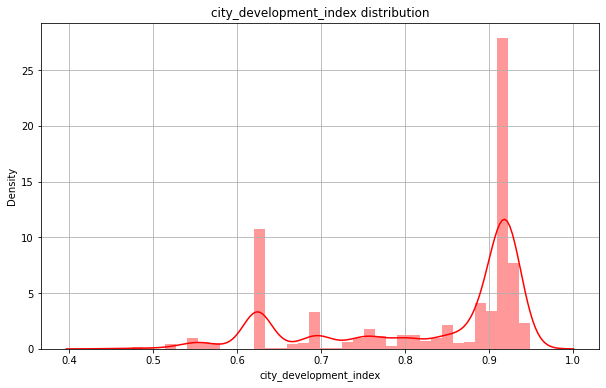

In [12]:
plt.figure(figsize=(10,6))
plt.grid(True)
sns.distplot(df['city_development_index'],color='red')
plt.title('city_development_index distribution')

Male      13221
Female     5746
Other       191
Name: gender, dtype: int64

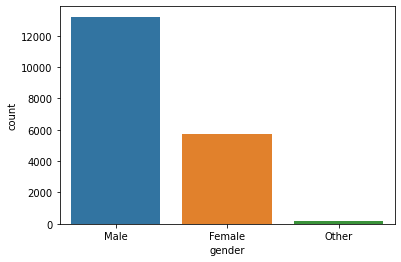

In [13]:
sns.countplot(df['gender'])
df.gender.value_counts()

# The Employees Having Experience or Not ?

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

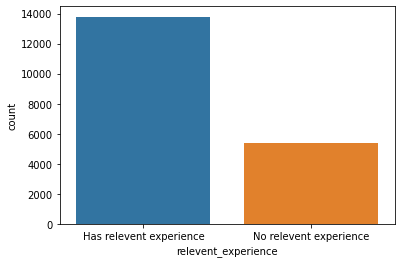

In [14]:
sns.countplot(df['relevent_experience'])
df['relevent_experience'].value_counts()

# The Employees Having total years of Experience ?

<AxesSubplot:xlabel='experience', ylabel='count'>

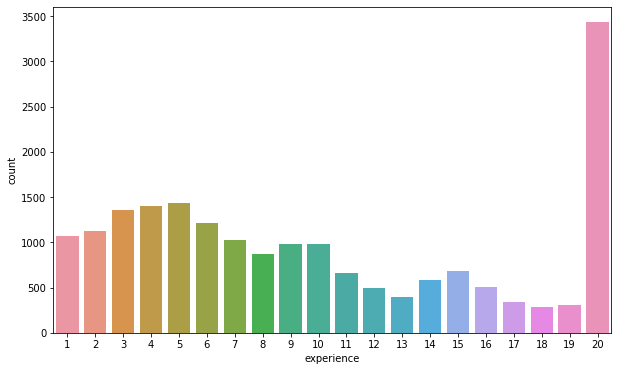

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df['experience'])

# In which company type the Employees Work more ?

Pvt Ltd                9817
Early Stage Startup    6743
Funded Startup         1001
Public Sector           955
NGO                     521
Other                   121
Name: company_type, dtype: int64

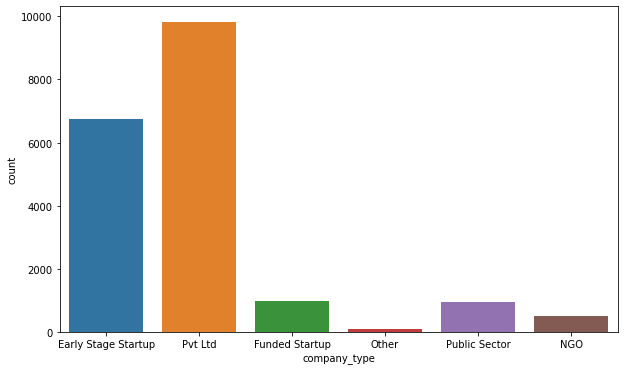

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['company_type'])
df['company_type'].value_counts()

# Education Level of Employees

Graduate          11598
Masters            4361
High School        2017
Phd                 874
Primary School      308
Name: education_level, dtype: int64

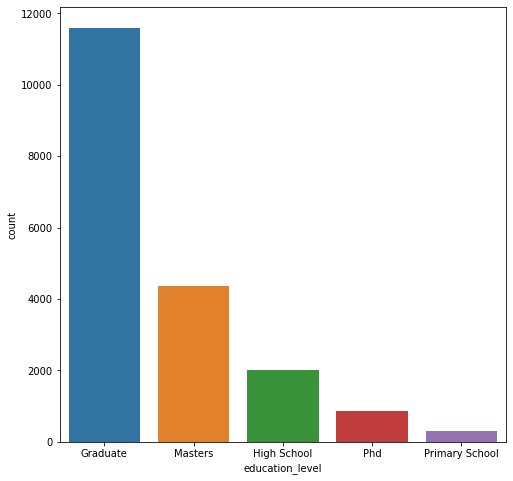

In [17]:
plt.figure(figsize=[8,8])
sns.countplot(df['education_level'])
df['education_level'].value_counts()

# Difference in years between previous job and current job of Employees 

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

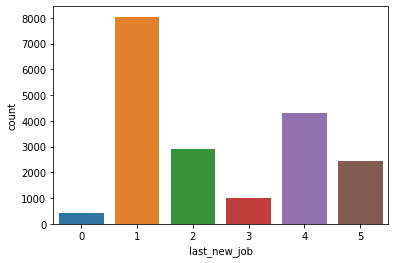

In [18]:
sns.countplot(df['last_new_job'])

# is the Employees enrolled  University courses ?

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

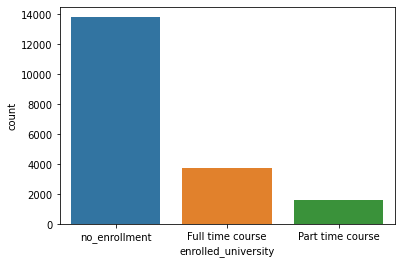

In [19]:
sns.countplot(df['enrolled_university'])

# from which educational background employees are more

STEM               14492
Business Degree     3140
Humanities           669
Other                381
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

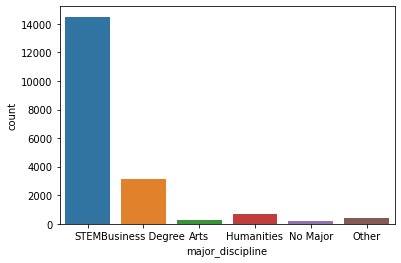

In [20]:
sns.countplot(df['major_discipline'])
df['major_discipline'].value_counts()

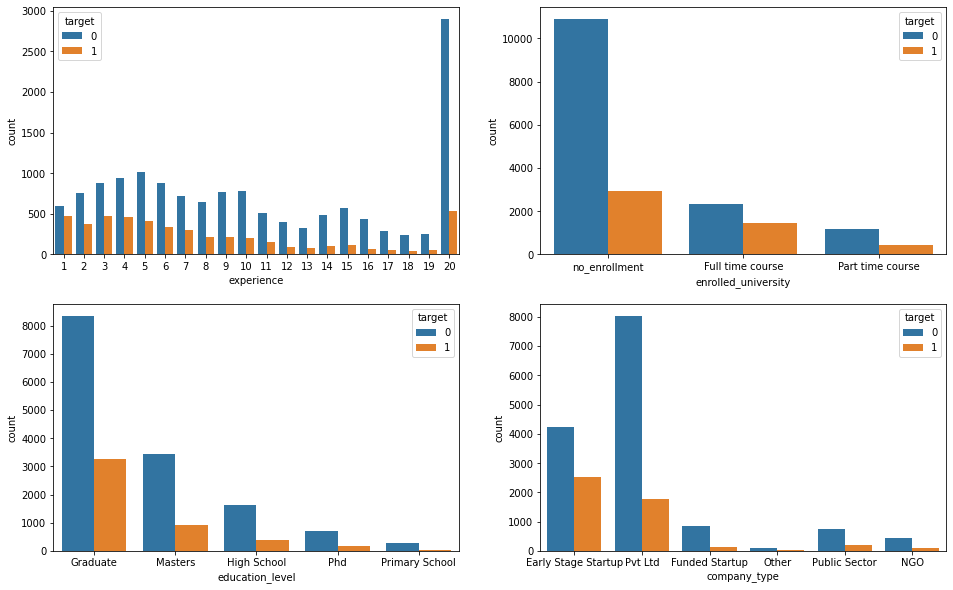

In [21]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.countplot(data=df,x='experience',hue='target',ax=axes[0,0])
sns.countplot(data=df,x='enrolled_university',hue='target',ax=axes[0,1])
sns.countplot(data=df,x='education_level',hue='target',ax=axes[1,0])
sns.countplot(data=df,x='company_type',hue='target',ax=axes[1,1])
plt.show()

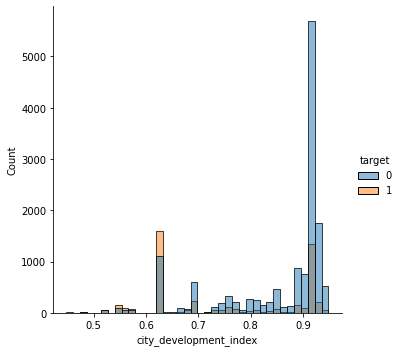

In [22]:
sns.displot(x ='city_development_index',hue='target',data =df)

In [23]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Early Stage Startup,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,4,47,0
2,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,Early Stage Startup,5,83,0
3,city_115,0.789,Female,No relevent experience,Part time course,Graduate,Business Degree,1,Pvt Ltd,5,52,1
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,Funded Startup,4,8,0


In [24]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['int64','float','int32'])

In [25]:
df_cat.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,Early Stage Startup
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
2,city_21,Female,No relevent experience,Full time course,Graduate,STEM,Early Stage Startup
3,city_115,Female,No relevent experience,Part time course,Graduate,Business Degree,Pvt Ltd
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,Funded Startup


In [26]:
df_cat.drop(['city'],axis=1,inplace=True)
df_num.drop(['city_development_index'],axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [29]:
df_cat

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,1,0,2,0,5,0
1,1,1,2,0,5,5
2,0,1,0,0,5,0
3,0,1,1,0,1,5
4,1,0,2,2,5,1
...,...,...,...,...,...,...
19153,1,1,2,0,2,0
19154,1,0,2,0,5,0
19155,1,0,2,0,5,5
19156,1,0,2,1,1,5


In [30]:
df_num

,experience,last_new_job,training_hours,target
0,20,1,36,1
1,15,4,47,0
2,5,5,83,0
3,1,5,52,1
4,20,4,8,0
...,...,...,...,...
19153,14,1,42,1
19154,14,4,52,1
19155,20,4,44,0
19156,1,2,97,0


In [31]:
df1=pd.concat([df_cat,df_num],axis=1)

In [32]:
df1

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,last_new_job,training_hours,target
0,1,0,2,0,5,0,20,1,36,1
1,1,1,2,0,5,5,15,4,47,0
2,0,1,0,0,5,0,5,5,83,0
3,0,1,1,0,1,5,1,5,52,1
4,1,0,2,2,5,1,20,4,8,0
...,...,...,...,...,...,...,...,...,...,...
19153,1,1,2,0,2,0,14,1,42,1
19154,1,0,2,0,5,0,14,4,52,1
19155,1,0,2,0,5,5,20,4,44,0
19156,1,0,2,1,1,5,1,2,97,0


In [33]:
x = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

In [34]:
x

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,experience,last_new_job,training_hours
0,1,0,2,0,5,0,20,1,36
1,1,1,2,0,5,5,15,4,47
2,0,1,0,0,5,0,5,5,83
3,0,1,1,0,1,5,1,5,52
4,1,0,2,2,5,1,20,4,8
...,...,...,...,...,...,...,...,...,...
19153,1,1,2,0,2,0,14,1,42
19154,1,0,2,0,5,0,14,4,52
19155,1,0,2,0,5,5,20,4,44
19156,1,0,2,1,1,5,1,2,97


In [35]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int32

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.5, random_state=1)

In [37]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest, ypred))
    print(classification_report(ytest, ypred))

In [38]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt=DecisionTreeClassifier()

In [39]:
mymodel(logreg)

0.7620837248146988
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      7223
           1       0.57      0.14      0.22      2356

    accuracy                           0.76      9579
   macro avg       0.67      0.55      0.54      9579
weighted avg       0.72      0.76      0.70      9579



In [40]:
mymodel(knn)

0.7159411212026308
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      7223
           1       0.36      0.21      0.26      2356

    accuracy                           0.72      9579
   macro avg       0.57      0.54      0.54      9579
weighted avg       0.67      0.72      0.69      9579



In [41]:
mymodel(svm)

0.7540453074433657
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7223
           1       0.00      0.00      0.00      2356

    accuracy                           0.75      9579
   macro avg       0.38      0.50      0.43      9579
weighted avg       0.57      0.75      0.65      9579



In [42]:
mymodel(dt)

0.66927654243658
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      7223
           1       0.34      0.35      0.34      2356

    accuracy                           0.67      9579
   macro avg       0.56      0.56      0.56      9579
weighted avg       0.67      0.67      0.67      9579



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(max_samples=100, random_state=5)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [45]:
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.7627100949994781
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7223
           1       0.60      0.11      0.19      2356

    accuracy                           0.76      9579
   macro avg       0.68      0.54      0.52      9579
weighted avg       0.73      0.76      0.69      9579



In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada=AdaBoostClassifier(n_estimators=100)

In [48]:
mymodel(ada)

0.7620837248146988
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7223
           1       0.55      0.17      0.26      2356

    accuracy                           0.76      9579
   macro avg       0.67      0.56      0.56      9579
weighted avg       0.72      0.76      0.71      9579



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gdc=GradientBoostingClassifier(n_estimators=100)

In [51]:
mymodel(gdc)

0.7618749347531057
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7223
           1       0.55      0.16      0.25      2356

    accuracy                           0.76      9579
   macro avg       0.67      0.56      0.56      9579
weighted avg       0.72      0.76      0.71      9579



In [52]:
from xgboost import XGBClassifier

In [53]:
 xgb=XGBClassifier()

In [54]:
mymodel(xgb)

[17:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7421442739325608
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7223
           1       0.45      0.23      0.30      2356

    accuracy                           0.74      9579
   macro avg       0.62      0.57      0.57      9579
weighted avg       0.70      0.74      0.71      9579



# Hyperparameter Tunning

In [55]:
accuracy = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    accuracy=accuracy_score(ytest, ypred)
    print(f"{i}-:{accuracy}")

1-:0.666144691512684
2-:0.7329575112224658
3-:0.7034137175070466
4-:0.7358805720847688
5-:0.7159411212026308
6-:0.7415179037477816
7-:0.7334794863764484
8-:0.7465288652260152
9-:0.7424574590249504
10-:0.7497651111807078
11-:0.7426662490865434
12-:0.7498695062115043
13-:0.7461112851028291
14-:0.7495563211191147
15-:0.7450673347948638
16-:0.7497651111807078
17-:0.7484079757803529
18-:0.7491387409959286
19-:0.7490343459651321
20-:0.7484079757803529
21-:0.7488255559035389
22-:0.7483035807495563
23-:0.7501826913038939
24-:0.7500782962730974
25-:0.7493475310575216
26-:0.7513310366426558
27-:0.7508090614886731
28-:0.7537321223509761
29-:0.7520618018582316


In [56]:
knn = KNeighborsClassifier(n_neighbors=28)
mymodel(knn)

0.7537321223509761
              precision    recall  f1-score   support

           0       0.76      0.97      0.86      7223
           1       0.50      0.08      0.13      2356

    accuracy                           0.75      9579
   macro avg       0.63      0.53      0.49      9579
weighted avg       0.70      0.75      0.68      9579



In [57]:
logreg = LogisticRegression(solver="liblinear")
mymodel(logreg)

0.7629188850610711
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      7223
           1       0.58      0.13      0.21      2356

    accuracy                           0.76      9579
   macro avg       0.68      0.55      0.54      9579
weighted avg       0.73      0.76      0.70      9579



In [58]:
for i in range(1,20):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain, ytrain)
    ypred = dt1.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7540453074433657
 2 -: 0.7540453074433657
 3 -: 0.7627100949994781
 4 -: 0.7637540453074434
 5 -: 0.7659463409541706
 6 -: 0.7622925148762919
 7 -: 0.7619793297839023
 8 -: 0.7573859484288548
 9 -: 0.7525837770122142
 10 -: 0.7467376552876083
 11 -: 0.7337926714688381
 12 -: 0.7264850193130807
 13 -: 0.7227267982044054
 14 -: 0.7155235410794446
 15 -: 0.7086334690468734
 16 -: 0.7000730765215576
 17 -: 0.6973588057208477
 18 -: 0.6878588579183631
 19 -: 0.6922434492118175


In [59]:
dt2 = DecisionTreeClassifier(max_depth=5)
mymodel(dt2)

0.7659463409541706
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      7223
           1       0.57      0.19      0.29      2356

    accuracy                           0.77      9579
   macro avg       0.68      0.57      0.57      9579
weighted avg       0.73      0.77      0.72      9579



In [60]:
cvs = cross_val_score(logreg, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.7575939876038037
STD -: 0.006066141243032777


In [61]:
cvs = cross_val_score(knn, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.7488254332398286
STD -: 0.0033084728848460894


In [62]:
cvs = cross_val_score(dt, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.663899234030594
STD -: 0.008701166873279646


In [63]:
cvs = cross_val_score(rf, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.7558713632180273
STD -: 0.004777136141474523


In [64]:
cvs = cross_val_score(ada, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.7569153544778633
STD -: 0.005360948300538764


In [65]:
cvs = cross_val_score(gdc, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nSTD -: {cvs.std()}")

Avg. Accuracy-: 0.7600469197621414
STD -: 0.0059230277032515976


In [67]:
ypredprob = rf.predict_proba(xtest)[:,1]

In [68]:
ypredprob

array([0.24, 0.34, 0.25, ..., 0.08, 0.05, 0.11])

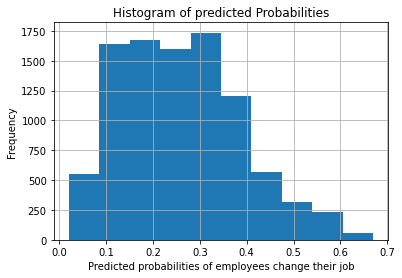

In [69]:
plt.hist(ypredprob)
plt.title("Histogram of predicted Probabilities")
plt.xlabel("Predicted probabilities of employees change their job")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [70]:
from sklearn.preprocessing import binarize

In [71]:
ypred = binarize([ypredprob], threshold=0.20)

In [72]:
from sklearn.metrics import roc_curve

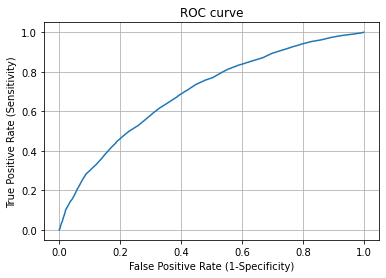

In [73]:
fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV
max_depth = [None,2,2,6,8,10,12]
parameter={'max_depth':max_depth}
classifier=DecisionTreeClassifier(random_state=0)
gs= GridSearchCV(classifier,parameter,scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 2, 2, 6, 8, 10, 12]},
             scoring='accuracy')

In [75]:
classifier=gs.best_estimator_
gs.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
accuracy=accuracy_score(ytest,ypred)
print(accuracy)

0.7627100949994781


# Result

The maximum accuracy got as 76.18 % by using Logistic Regression and gradient boost Classifier